In [18]:
import glob
import json
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fn_list = glob.glob('AudioDataArchive/08-03-23/*.parquet')
print(len(fn_list))

87


In [3]:
sample = fn_list[0]
sample_df = pd.DataFrame()
sample_df = pd.read_parquet(sample)
sample_df

,timestamp,value
0,8.460046e+06,"{""ZM6_MillRPM"":501.9599609375,""ZM6_MillFPM"":27..."
1,8.460049e+06,"{""ZM6_MillRPM"":502.3199462890625,""ZM6_MillFPM""..."
2,8.460051e+06,"{""ZM6_MillRPM"":502.13995361328125,""ZM6_MillFPM..."
3,8.460054e+06,"{""ZM6_MillRPM"":501.77996826171875,""ZM6_MillFPM..."
4,8.460056e+06,"{""ZM6_MillRPM"":501.9599609375,""ZM6_MillFPM"":27..."
...,...,...
8993,8.481634e+06,"{""ZM6_MillRPM"":-0.059999994933605194,""ZM6_Mill..."
8994,8.481636e+06,"{""ZM6_MillRPM"":0,""ZM6_MillFPM"":0,""ZM6_RightTen..."
8995,8.481639e+06,"{""ZM6_MillRPM"":0,""ZM6_MillFPM"":0,""ZM6_RightTen..."
8996,8.481641e+06,"{""ZM6_MillRPM"":-0.059999994933605194,""ZM6_Mill..."


In [4]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8998 entries, 0 to 8997
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  8998 non-null   float64
 1   value      8998 non-null   object 
dtypes: float64(1), object(1)
memory usage: 140.7+ KB


In [5]:
sample_df= pd.concat([sample_df.loc[:,['timestamp']],sample_df.loc[:].value.apply(json.loads).apply(pd.Series)], axis=1)
norm_sample_df=(sample_df-sample_df.min())/(sample_df.max()-sample_df.min())
norm_sample_df

,timestamp,ZM6_MillRPM,ZM6_MillFPM,ZM6_RightTension,ZM6_LeftTension,WMAX0,RMS0,GNDOFF0,ZCS0,WMAX1,ZCS1,RMS1,GNDOFF1
0,0.000000,0.830354,0.664581,0.420817,0.405523,0.051630,0.276000,0.468575,0.694913,0.127696,0.612966,0.419081,0.000000
1,0.000111,0.830595,0.664788,0.421438,0.405789,0.053813,0.277575,0.485376,0.696397,0.085095,0.621905,0.411307,0.000000
2,0.000222,0.830474,0.664797,0.421107,0.405127,0.054821,0.277384,0.500311,0.698509,0.448467,0.633515,0.433922,0.010309
3,0.000333,0.830233,0.664401,0.420955,0.405534,0.050107,0.278958,0.500311,0.689607,0.127696,0.569711,0.474205,0.010309
4,0.000443,0.830354,0.664557,0.421353,0.405867,0.058300,0.282564,0.501556,0.697252,0.065222,0.587383,0.487633,0.010309
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8993,0.999555,0.494235,0.000000,0.000000,0.000000,0.004673,0.003339,0.443684,0.962383,0.047622,0.814600,0.129329,0.989691
8994,0.999667,0.494275,0.000000,0.000000,0.000000,0.003041,0.003631,0.443684,0.958611,0.102748,0.823590,0.108834,0.989691
8995,0.999778,0.494275,0.000000,0.000000,0.000000,0.004672,0.003466,0.443062,0.965224,0.132770,0.815576,0.134276,0.989691
8996,0.999889,0.494235,0.000000,0.000000,0.000000,0.006514,0.003479,0.443062,0.985189,0.485941,0.787887,0.162544,1.000000


C:\Users\fj4908.NASDOMAIN\Documents\GitHub\audio-modeling\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


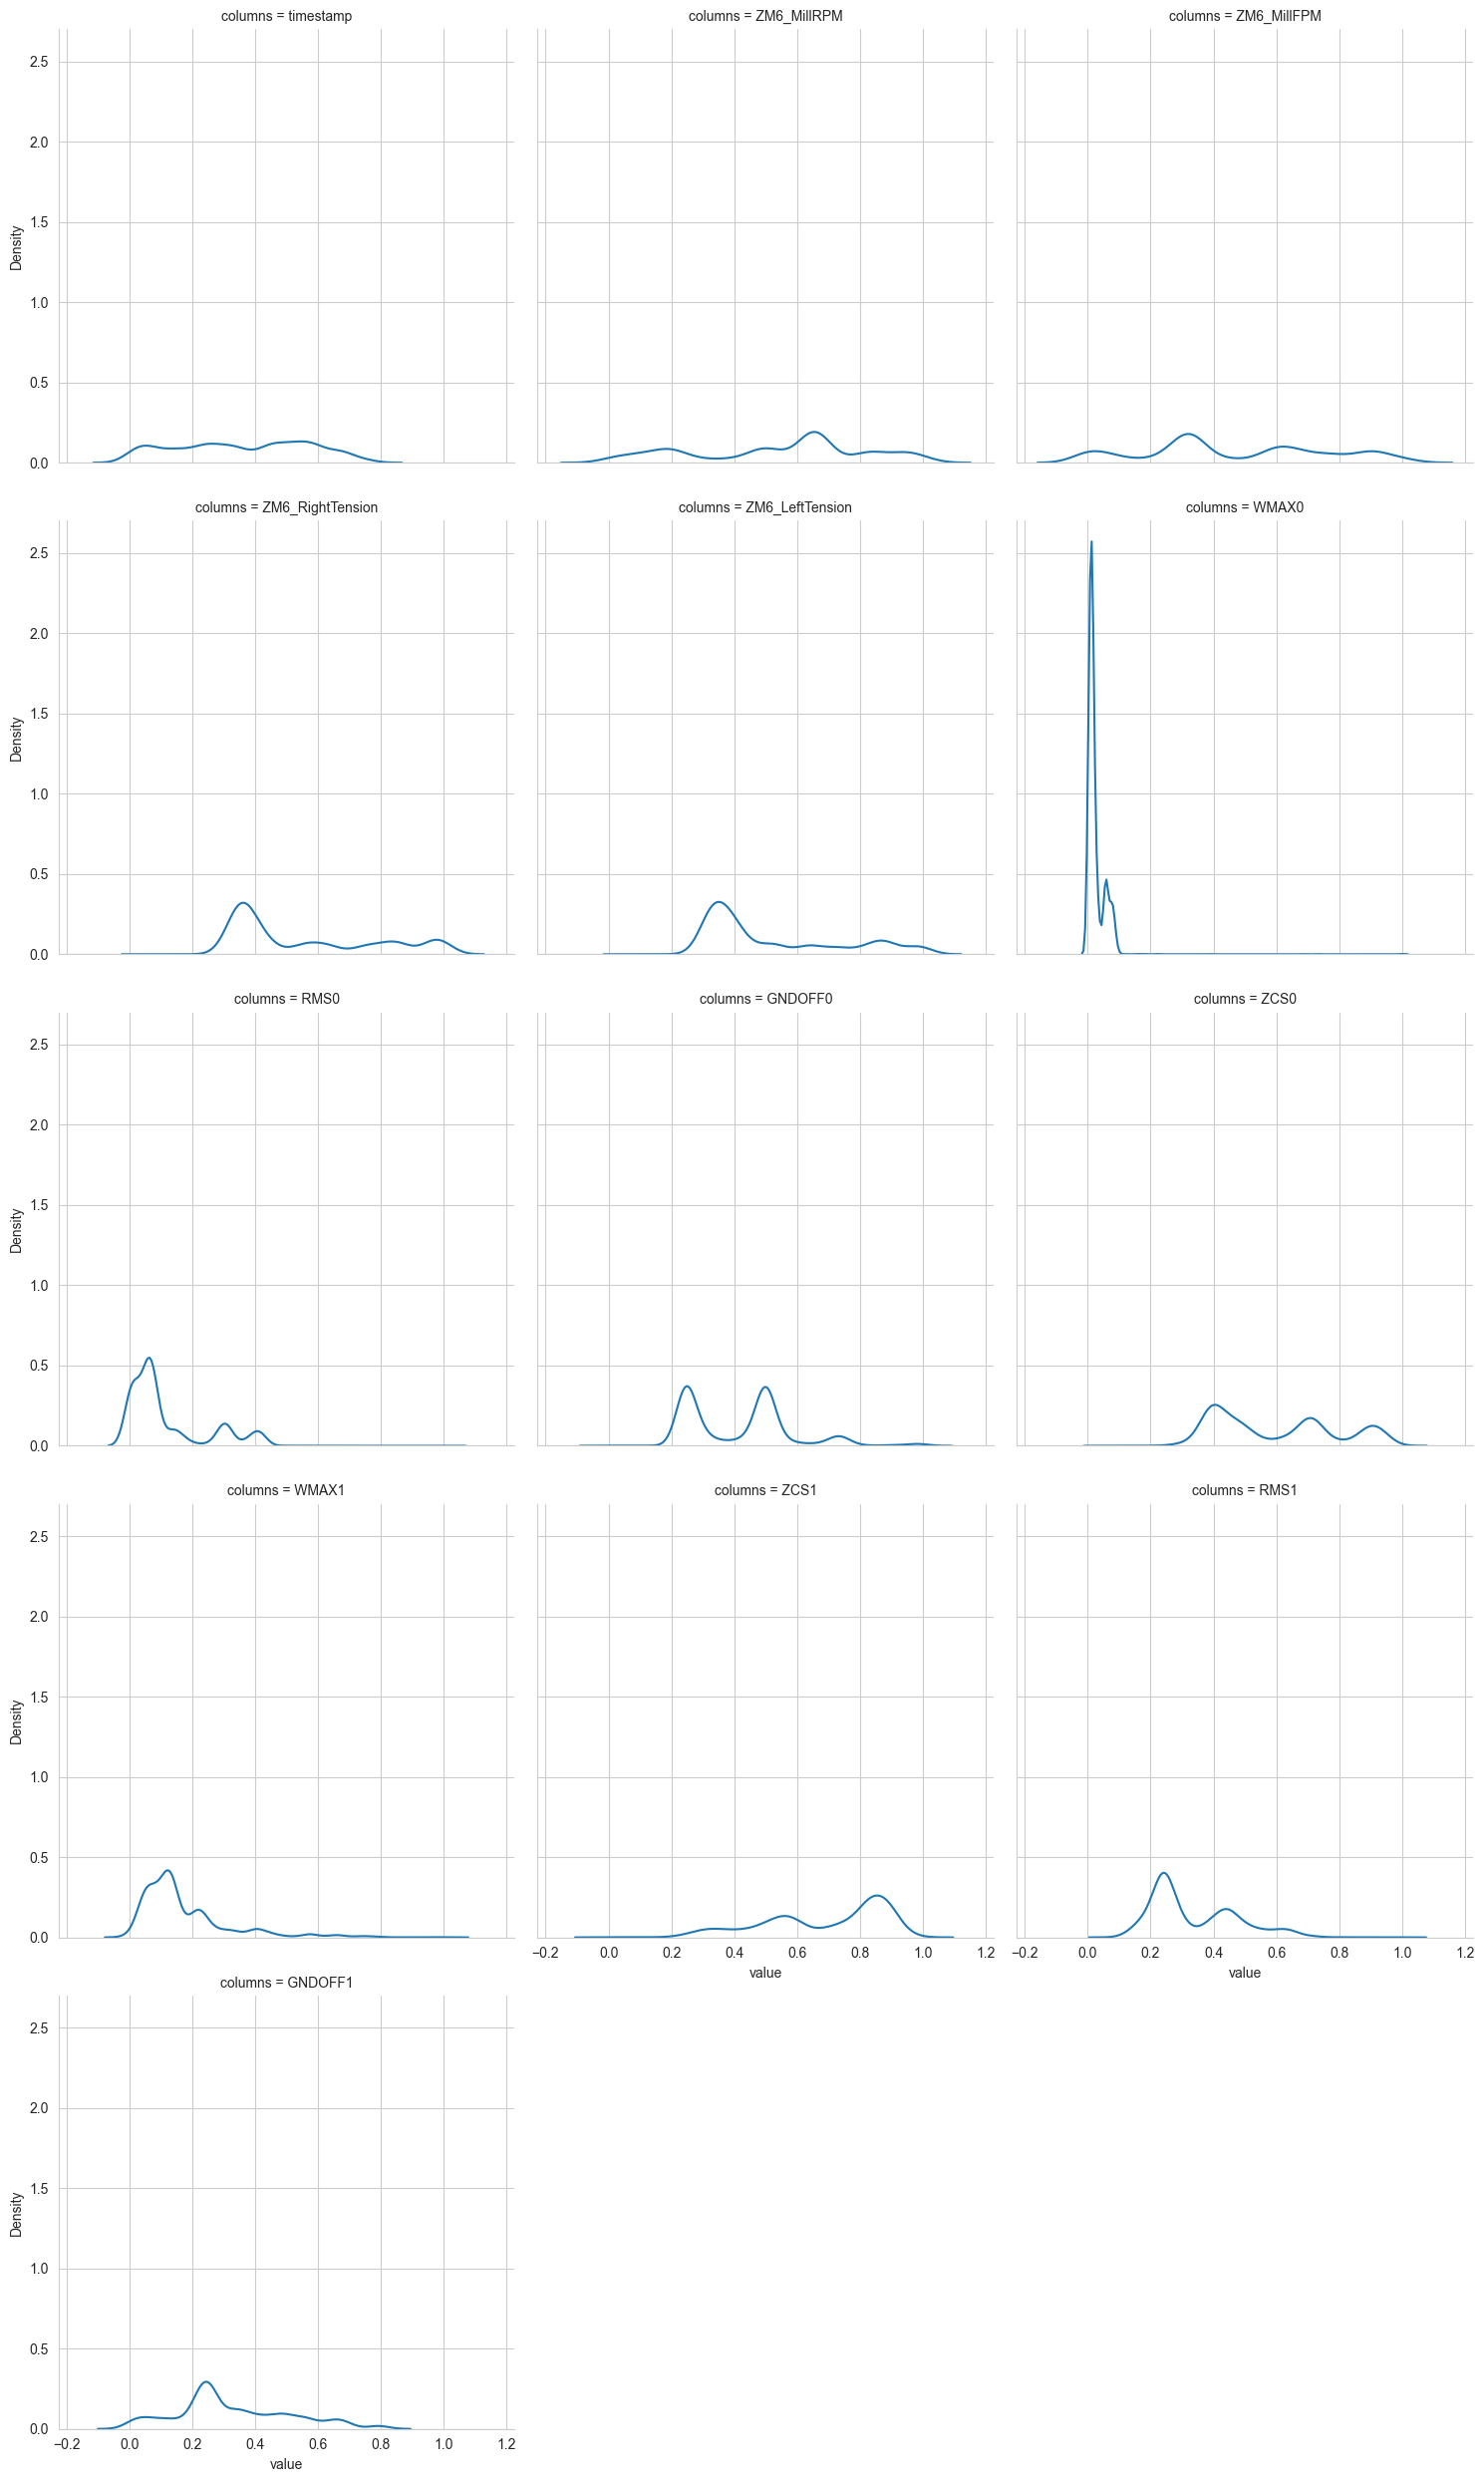

In [41]:
norm_sample_dfm = norm_sample_df.melt(var_name='columns')
g = sns.displot(data=norm_sample_dfm, x='value', col='columns', kind='kde',col_wrap=3)

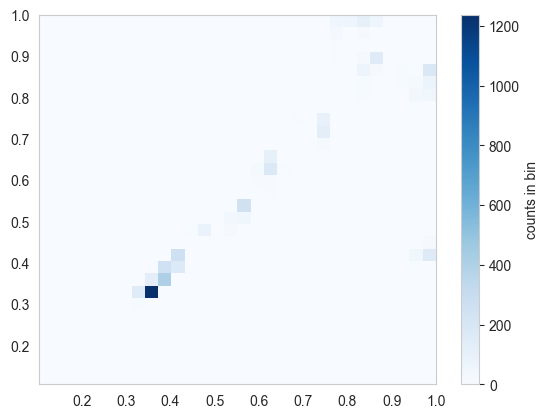

In [42]:
plt.hist2d(norm_sample_df['ZM6_RightTension'], norm_sample_df['ZM6_LeftTension'], bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

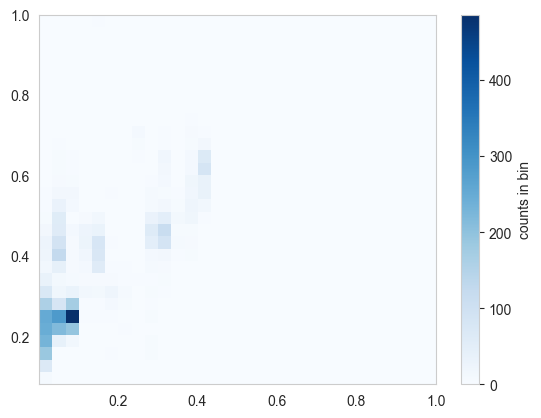

In [43]:
plt.hist2d(norm_sample_df['RMS0'], norm_sample_df['RMS1'], bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

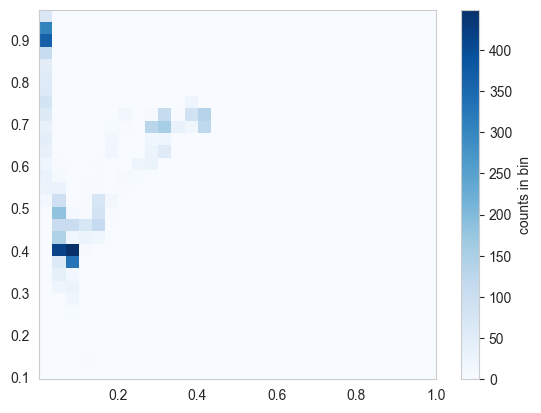

In [44]:
plt.hist2d(norm_sample_df['RMS0'], norm_sample_df['ZCS0'], bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

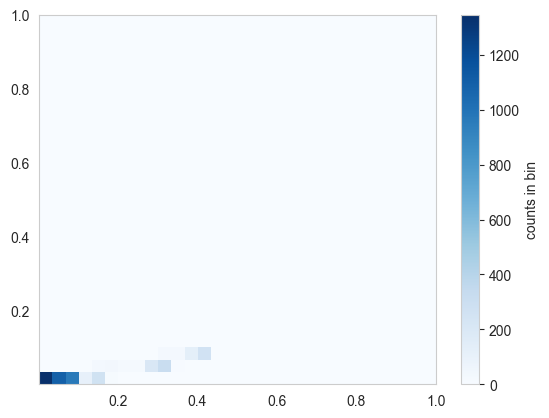

In [45]:
plt.hist2d(norm_sample_df['RMS0'], norm_sample_df['WMAX0'], bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

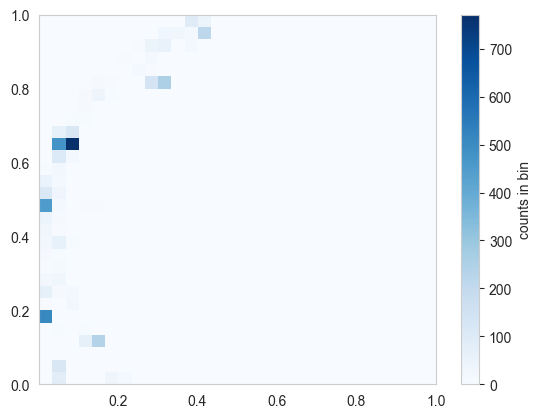

In [46]:
plt.hist2d(norm_sample_df['RMS0'], norm_sample_df['ZM6_MillRPM'], bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

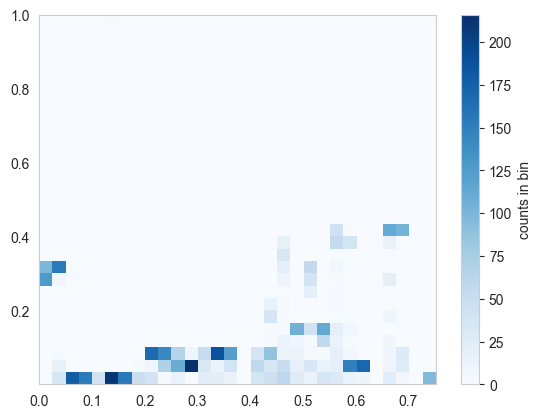

In [47]:
plt.hist2d(norm_sample_df['timestamp'], norm_sample_df['RMS0'], bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

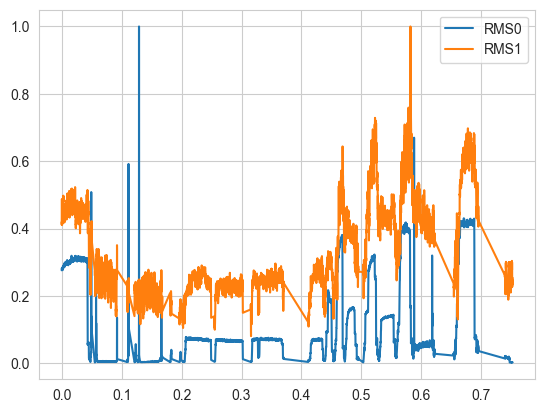

In [61]:
plt.plot(norm_sample_df['timestamp'], norm_sample_df[['RMS0','RMS1']])
plt.legend(['RMS0','RMS1'])

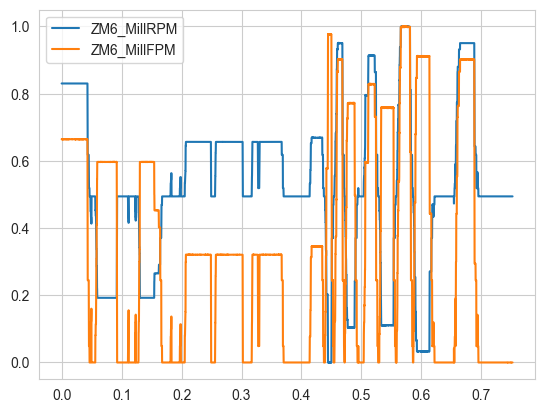

In [60]:
plt.plot(norm_sample_df['timestamp'], norm_sample_df[['ZM6_MillRPM','ZM6_MillFPM']])
plt.legend(['ZM6_MillRPM','ZM6_MillFPM'])

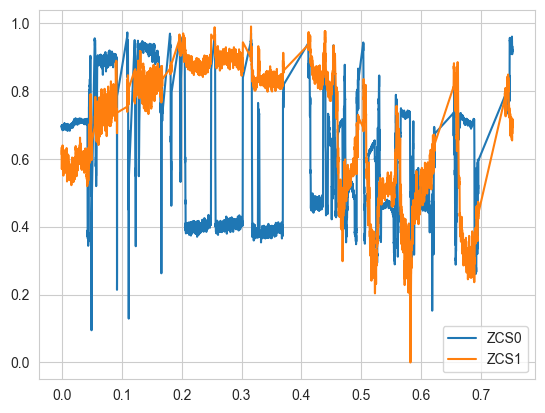

In [58]:
plt.plot(norm_sample_df['timestamp'], norm_sample_df[['ZCS0','ZCS1']])
plt.legend(['ZCS0','ZCS1'])

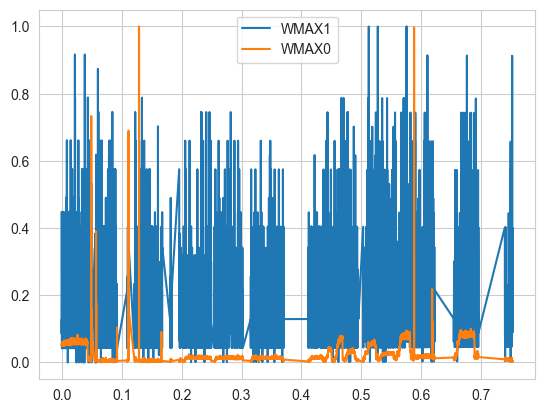

In [56]:
plt.plot(norm_sample_df['timestamp'], norm_sample_df[['WMAX1','WMAX0']])
plt.legend(labels=['WMAX1','WMAX0'])

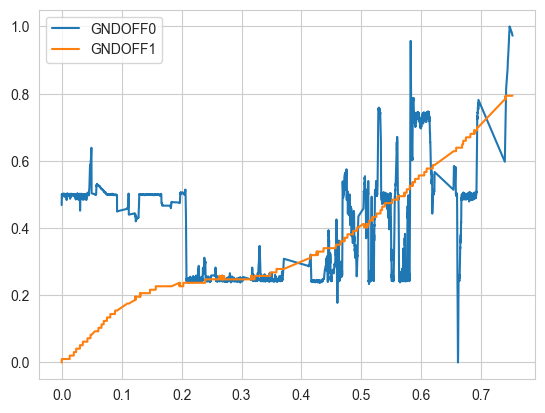

In [57]:
plt.plot(norm_sample_df['timestamp'], norm_sample_df[['GNDOFF0','GNDOFF1']])
plt.legend(labels=['GNDOFF0','GNDOFF1'])

In [70]:
norm_sample_df = norm_sample_df[norm_sample_df['ZM6_MillRPM'] > 0]

In [71]:
audio = norm_sample_df[['GNDOFF0','GNDOFF1','RMS1','RMS0','WMAX1','WMAX0','ZCS1','ZCS0']]
audio

,GNDOFF0,GNDOFF1,RMS1,RMS0,WMAX1,WMAX0,ZCS1,ZCS0
0,0.468575,0.000000,0.419081,0.276000,0.127696,0.051630,0.612966,0.694913
1,0.485376,0.000000,0.411307,0.277575,0.085095,0.053813,0.621905,0.696397
2,0.500311,0.010309,0.433922,0.277384,0.448467,0.054821,0.633515,0.698509
3,0.500311,0.010309,0.474205,0.278958,0.127696,0.050107,0.569711,0.689607
4,0.501556,0.010309,0.487633,0.282564,0.065222,0.058300,0.587383,0.697252
...,...,...,...,...,...,...,...,...
6766,0.975731,0.793814,0.247350,0.002793,0.401797,0.006687,0.709853,0.922553
6767,0.975109,0.793814,0.232509,0.002552,0.216913,0.003214,0.701223,0.914657
6768,0.973864,0.793814,0.234629,0.003161,0.131765,0.004996,0.692130,0.920893
6769,0.973242,0.793814,0.253710,0.002907,0.089165,0.002716,0.715966,0.921321


In [72]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import plotly.express as px

pca = PCA(n_components=2)
X_pca = pca.fit_transform(audio)
fig = px.scatter(x=X_pca[:, 0], y=X_pca[:, 1])
fig.update_layout(
    title="PCA visualization of Custom Classification dataset",
    xaxis_title="First Principal Component",
    yaxis_title="Second Principal Component",
)
fig.show()


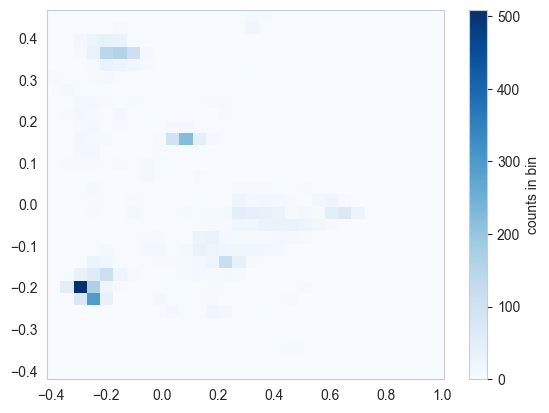

In [73]:
plt.hist2d(X_pca[:,0],X_pca[:,1], bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

In [74]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(audio)
tsne.kl_divergence_

0.6072547435760498

In [75]:
fig = px.scatter(x=X_tsne[:, 0], y=X_tsne[:, 1])
fig.update_layout(
    title="t-SNE visualization of Custom Classification dataset",
    xaxis_title="First t-SNE",
    yaxis_title="Second t-SNE",
)
fig.show()

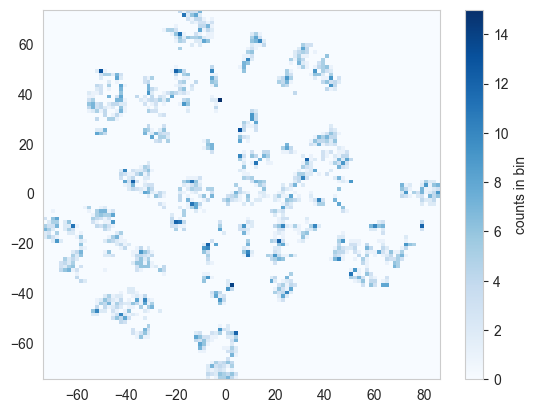

In [79]:
plt.hist2d(X_tsne[:,0],X_tsne[:,1], bins=100, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')